# Real Estate Price - Machine Learning

Source
---
https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set



Assignment
---
1. Study the dataset
- Choose 2 datasets from UCI Machine Learning Repository with more than 3 dimensions.
(http://archive.ics.uci.edu/ml/)
- For each dataset, determine which feature is discrete or continuous? is it quantitative or
qualitative? Explain.
- Calculate mean, variance, covariance, correlation of the selected datasets.
- Find the most corelated couple of features of each dataset. Comment on the results.


2. PCA
- Apply PCA on the two selected datasets
- How much of the total variation in the data is explained by the first two principal components?
- How well are the individual classes separated in the case we use two principal components?
Explain.
- Increase the number of principal components used, analyze and comment on the obtained
results.
- Visualize data distribution in 2D.


In [2]:
import pandas as pd
import numpy as np

In [3]:
xlsx_path = r'./databases/real_estate_valuation.xlsx'
df = pd.read_excel(xlsx_path)
csv_path = r'./databases/real_estate_valuation.csv'
df.to_csv(csv_path, index=False, header=True, encoding='utf-8-sig', sep=',', decimal='.')

In [4]:
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Attribute Information
---
The inputs are as follows:
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

X2=the house age (unit: year)

X3=the distance to the nearest MRT station (unit: meter)

X4=the number of convenience stores in the living circle on foot (integer)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow:
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)
According to the explanations found on https://stackoverflow.com/questions/1779622/continuous-vs-discrete-attributes, discrete attributes only take certain limited values, usually countable while continuous attributes can be as large or small within a range and they are measured.


# Ex1
## Discrete attributes
X1=the transaction date

X2=the house age (unit: year): since the house age is by year and not by time, this attribute should be discrete.

X4=the number of convenience stores in the living circle on foot (integer)
## Continous attributes
X3=the distance to the nearest MRT station (unit: meter)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

Unfortunately in this dataset, we do not have any qualitative attributes, the ones which can not be measured in any units.
## Quantitative attributes
X1=the transaction date

X2=the house age (unit: year)

X3=the distance to the nearest MRT station (unit: meter)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

X4=the number of convenience stores in the living circle on foot (integer)

## Mean, variance, covariance, correlation of the dataset

In [5]:
def mean(x):
    mean_x = sum(x)/float(len(x))
    return mean_x
def variance(x):
    mean_x = sum(x)/float(len(x))
    X = [x_i - mean_x for x_i in x]
    n = len(x)
    var_x = sum([pow(X[i], 2) for i in range(n)])
    return var_x/n
def covariance(x, y):
    if len(x) != len(y):
        print('\nInputs should have the same length!')
    else:
        mean_x = sum(x)/float(len(x))
        mean_y = sum(y)/float(len(y))
        
        X = [x_i - mean_x for x_i in x]
        Y = [y_i - mean_y for y_i in y]
        n = len(x)
        numerator = sum([X[i]*Y[i] for i in range(n)])
        denominator = n-1
        covar = numerator/denominator
        return covar
def correlation(x, y):
    if len(x) != len(y):
        print('\nInputs should have the same length!')
    else:
        mean_x = sum(x)/float(len(x))
        mean_y = sum(y)/float(len(y))
        
        X = [x_i - mean_x for x_i in x]
        Y = [y_i - mean_y for y_i in y]
        n = len(x)
        numerator = sum([X[i]*Y[i] for i in range(n)])
        var_x = sum([pow(X[i], 2) for i in range(n)])
        var_y = sum([pow(Y[i], 2) for i in range(n)])
        denominator = var_x**0.5 * var_y**0.5
        cor = numerator/denominator
        return cor

In [6]:
# tests
x = [5.1, 4.9, 4.7, 4.6, 5.0]
y = [3.5, 3.0, 3.2, 3.1, 3.6]   
print(mean(x)) 
print(np.mean(x)) 
print(variance(x)) 
print(np.var(x)) 
print(covariance(x, y))
print(np.cov(x, y)[0][1])
print(correlation(x, y))
print(np.corrcoef(x, y)[0][1])

4.859999999999999
4.859999999999999
0.0344
0.0344
0.03649999999999996
0.036499999999999956
0.6800192944972807
0.6800192944972806


In [7]:
X1 = df['X1 transaction date']
X2 = df['X2 house age']
X3 = df['X3 distance to the nearest MRT station']
X4 = df['X4 number of convenience stores']
X5 = df['X5 latitude']
X6 = df['X6 longitude']
Y0 = df['Y house price of unit area']

# EX2

Apply PCA on the two selected datasets
---
## Steps
1. Standardize the dataset
2. Calculate the covariance matrix for the features in the dataset.
3. Calculate the eigenvalues and eigenvectors for the covariance matrix.
4. Sort eigenvalues and their corresponding eigenvectors.
5. Pick k eigenvalues and form a matrix of eigenvectors.
6. Transform the original matrix.

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [9]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:

features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude',	'X6 longitude']

x = df.loc[:, features].values

y = df.loc[:, ['Y house price of unit area']].values

x = StandardScaler().fit_transform(x)

In [36]:
pca = PCA(n_components=5)
principal_components = pca.fit_transform(x)

In [37]:
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
principal_df = pd.DataFrame(data = principal_components, columns=columns)
principal_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.119131,1.455327,0.562260,-0.869479,0.146612
1,-1.736644,0.341114,0.632466,-0.784314,0.177388
2,-1.395581,-0.283772,0.707147,0.643045,0.398997
3,-1.395581,-0.283772,0.707147,0.643045,0.398997
4,-1.127593,-1.072009,0.429685,0.268325,0.124991


In [29]:
price_by_area_df = df[['Y house price of unit area']]
new_df = pd.concat([principal_df, price_by_area_df], axis=1) # a list of df will do
new_df.head()

,PC1,PC2,PC3,PC4,PC5,Y house price of unit area
0,-2.119131,1.455327,0.562260,-0.869479,0.146612,37.9
1,-1.736644,0.341114,0.632466,-0.784314,0.177388,42.2
2,-1.395581,-0.283772,0.707147,0.643045,0.398997,47.3
3,-1.395581,-0.283772,0.707147,0.643045,0.398997,54.8
4,-1.127593,-1.072009,0.429685,0.268325,0.124991,43.1


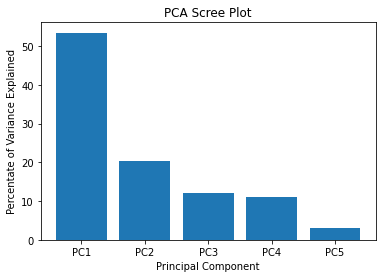

In [34]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
labels = ['PC' + str(x) for x in range(1, len(percent_variance) + 1)]
plt.bar(x=range(1, len(percent_variance) + 1), height=percent_variance, tick_label=labels)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0, 0.5, 'PC2')

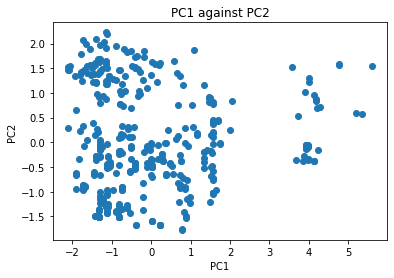

In [32]:
# pca.components_
plt.scatter(principal_df.PC1, principal_df.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [33]:
pca.explained_variance_ratio_

array([0.53472899, 0.20414841, 0.12091694, 0.10993216, 0.0302735 ])

The above result shows that PC1 and PC2 explain most of the variance, so PC1 and PC2 should do the job of representing the the original data